## Cargo Screener Certification-Exam-Readiness Predictor

### ML Project Life cycle

1. Understanding the Problem Statement
1. Data Collection
1. Data Checks -to ensure the quality and integrity of the data 
1. EDA
1. Data Pre-Processing
     1. Data Cleaning
     1. Data Transformation
     1. Feature Scaling
     1. Data Splitting
     1. Handling Text Data
     1. Feature Scaling and Normalization
     1. Data Standardization
     1. Data Encoding and Labeling
     1. Data Imputation
     1. Data Balancing
     1. Data Documentation and Logging
1. Model Training
1. Choose best model

### Data Collection
- Dataset Source - company data with modified column names and values
- The data consists of 13 column and 1600 rows.

### Import Data and Required Packages

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load raw data

In [128]:
df = pd.read_csv('data/cargo_screener.csv')

In [129]:
# show top 5 rows
df.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,hr_interview_score,x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score,tsa_test_score,cbp_test_score,Certification_exam_Outcome
0,male,group A,high school,fluent,none,63,74,63,69.0,66,63,62.0,FAIL
1,female,group E,some college,intermediate,provided,83,95,83,89.0,89,88,85.0,PASS
2,male,group A,some college,fluent,none,46,58,46,52.0,47,43,43.0,FAIL
3,female,group E,some college,fluent,provided,71,83,71,77.0,76,74,73.0,PASS
4,male,group E,some college,fluent,none,68,80,68,74.0,72,72,65.0,PASS


In [130]:
# show bottom 5 rows
df.tail()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,hr_interview_score,x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score,tsa_test_score,cbp_test_score,Certification_exam_Outcome
1595,female,group C,some college,fluent,none,63,75,63,69.0,69,69,65.0,FAIL
1596,female,group A,high school,intermediate,none,63,76,63,69.0,71,67,73.0,FAIL
1597,male,group A,some college,intermediate,provided,80,92,80,86.0,83,78,81.0,PASS
1598,male,group C,associate's degree,fluent,none,40,51,40,46.0,41,37,35.0,FAIL
1599,female,group A,some college,fluent,none,59,71,59,65.0,64,58,64.0,FAIL


#### dataset shape and info

In [131]:
df.shape

(1600, 13)

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
<ul>
 <li>There are 303 rows and 14 columns in the dataset,
          total of 13 features and 1 target variable</li>
 
 </ul>
</div>

### Data Dictionary

1. age : age of persons
1. gender : gender of trainee/examinee (3 values)
    
1. race_ethnicity : race of examinee (5 values)
   
1. level_of_education : EXAMINEE'S EDUCATIONAL LEVEL ( values)
1. language_proficiency : examinee's ability to communicate effectively in a English language
1. training_manuals : weather examinee has been covered all training manuals provided
   
1. hr_interview_score : result examinee scored in the test at the begining of recruitment
    
1. x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score : columns for result examinee scored in the tests for each of the modules at end of each module
1. tsa_test_score : result examinee scored in the tsa-prepared test
   
1. cbp_test_score : result examinee scored in the cbp-prepared test  
1. Target--> Certification_exam_score : the final exam score for certification with examinee who scores less than 85% Failed
   

###  Data Checks

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [132]:
# check for missing values
df.isna().sum()

gender                            0
race_ethnicity                    0
level_of_education               10
language_proficiency              0
training_manuals                 12
hr_interview_score                0
x_ray_module_assessment_score     0
etd_module_assessment_score       0
phy_module_assessment_score       1
dg_module_assessment_score        0
tsa_test_score                    0
cbp_test_score                    1
Certification_exam_Outcome        0
dtype: int64

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
There are missing values in some columns

In [133]:
# check for duplicates
len(df[df.duplicated()])

483

<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
There are 483 duplicate values in the dataset

### Handling Duplicate values

In [134]:
# Drop the duplicate data
df = df.drop_duplicates()

In [135]:
# check for  duplicate data
num_duplicates = len(df[df.duplicated(keep=False)])  # Use 'keep=False' to count all duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
There are no duplicate values in the dataset

In [136]:
# # Imputation for missing values
# # numerical columns

# df['phy_module_assessment_score'].fillna(df['phy_module_assessment_score'].mean(), inplace=True)
# df['cbp_test_score'].fillna(df['cbp_test_score'].mean(), inplace=True)
# df['Certification_exam_score'].fillna(df['Certification_exam_score'].mean(), inplace=True)

# # categorical columns
# df['level_of_education'].fillna(df['level_of_education'].mode()[0], inplace=True)
# df['training_manuals'].fillna(df['training_manuals'].mode()[0], inplace=True)



In [137]:
# check for missing data
# df.isna().sum()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 0 to 1576
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1117 non-null   object 
 1   race_ethnicity                 1117 non-null   object 
 2   level_of_education             1107 non-null   object 
 3   language_proficiency           1117 non-null   object 
 4   training_manuals               1105 non-null   object 
 5   hr_interview_score             1117 non-null   int64  
 6   x_ray_module_assessment_score  1117 non-null   int64  
 7   etd_module_assessment_score    1117 non-null   int64  
 8   phy_module_assessment_score    1116 non-null   float64
 9   dg_module_assessment_score     1117 non-null   int64  
 10  tsa_test_score                 1117 non-null   int64  
 11  cbp_test_score                 1116 non-null   float64
 12  Certification_exam_Outcome     1117 non-null   object

In [139]:
df.shape

(1117, 13)

In [140]:
df.nunique()

gender                            3
race_ethnicity                    5
level_of_education                6
language_proficiency              3
training_manuals                  2
hr_interview_score               74
x_ray_module_assessment_score    76
etd_module_assessment_score      75
phy_module_assessment_score      73
dg_module_assessment_score       74
tsa_test_score                   72
cbp_test_score                   77
Certification_exam_Outcome        2
dtype: int64

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hr_interview_score,1117.0,68.496867,14.532476,9.0,59.0,69.0,79.0,101.0
x_ray_module_assessment_score,1117.0,79.916741,14.270532,21.0,70.0,81.0,90.0,112.0
etd_module_assessment_score,1117.0,68.480752,14.614363,9.0,59.0,69.0,79.0,103.0
phy_module_assessment_score,1116.0,74.462366,14.587956,15.0,65.0,75.0,85.0,106.0
dg_module_assessment_score,1117.0,72.412713,14.807146,15.0,62.0,73.0,83.0,103.0
tsa_test_score,1117.0,69.894360,14.905483,17.0,60.0,71.0,81.0,100.0
cbp_test_score,1116.0,68.918459,15.513211,10.0,58.0,70.0,80.0,100.0


### more deeper data exporation

In [142]:
df.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,hr_interview_score,x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score,tsa_test_score,cbp_test_score,Certification_exam_Outcome
0,male,group A,high school,fluent,none,63,74,63,69.0,66,63,62.0,FAIL
1,female,group E,some college,intermediate,provided,83,95,83,89.0,89,88,85.0,PASS
2,male,group A,some college,fluent,none,46,58,46,52.0,47,43,43.0,FAIL
3,female,group E,some college,fluent,provided,71,83,71,77.0,76,74,73.0,PASS
4,male,group E,some college,fluent,none,68,80,68,74.0,72,72,65.0,PASS


In [143]:
# unique values in cat columns
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'level of education' variable:",end=" " )
print(df['level_of_education'].unique())

print("Categories in 'language proficiency' variable:     ",end=" " )
print(df['language_proficiency'].unique())

print("Categories in 'training manuals' variable:     ",end=" " )
print(df['training_manuals'].unique())

Categories in 'gender' variable:      ['male' 'female' 'other']
Categories in 'race_ethnicity' variable:   ['group A' 'group E' 'group B' 'group D' 'group C']
Categories in'level of education' variable: ['high school' 'some college' 'some high school' nan "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'language proficiency' variable:      ['fluent' 'intermediate' 'limitted']
Categories in 'training manuals' variable:      ['none' 'provided' nan]


In [144]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('There are {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nThere are {} categorical features : {}'.format(len(categorical_features), categorical_features))

There are 7 numerical features : ['hr_interview_score', 'x_ray_module_assessment_score', 'etd_module_assessment_score', 'phy_module_assessment_score', 'dg_module_assessment_score', 'tsa_test_score', 'cbp_test_score']

There are 6 categorical features : ['gender', 'race_ethnicity', 'level_of_education', 'language_proficiency', 'training_manuals', 'Certification_exam_Outcome']


### Adding a column for Average score of all in-company preparation exams

In [145]:

df['pre_exams_average'] = ((df['hr_interview_score'] + df['x_ray_module_assessment_score'] +
                           df['etd_module_assessment_score']+ df['phy_module_assessment_score'] + 
                           df['dg_module_assessment_score'] + df['tsa_test_score']+ df['cbp_test_score'])/7).round()
df.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,hr_interview_score,x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score,tsa_test_score,cbp_test_score,Certification_exam_Outcome,pre_exams_average
0,male,group A,high school,fluent,none,63,74,63,69.0,66,63,62.0,FAIL,66.0
1,female,group E,some college,intermediate,provided,83,95,83,89.0,89,88,85.0,PASS,87.0
2,male,group A,some college,fluent,none,46,58,46,52.0,47,43,43.0,FAIL,48.0
3,female,group E,some college,fluent,provided,71,83,71,77.0,76,74,73.0,PASS,75.0
4,male,group E,some college,fluent,none,68,80,68,74.0,72,72,65.0,PASS,71.0


In [146]:
# Interchange the order of columns  while keeping the rest as is
columns_to_move = ['pre_exams_average', 'Certification_exam_Outcome']
new_columns_order = [col for col in df.columns if col not in columns_to_move] + columns_to_move

# Reorder the DataFrame's columns based on the new order
df = df[new_columns_order]
df.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,hr_interview_score,x_ray_module_assessment_score,etd_module_assessment_score,phy_module_assessment_score,dg_module_assessment_score,tsa_test_score,cbp_test_score,pre_exams_average,Certification_exam_Outcome
0,male,group A,high school,fluent,none,63,74,63,69.0,66,63,62.0,66.0,FAIL
1,female,group E,some college,intermediate,provided,83,95,83,89.0,89,88,85.0,87.0,PASS
2,male,group A,some college,fluent,none,46,58,46,52.0,47,43,43.0,48.0,FAIL
3,female,group E,some college,fluent,provided,71,83,71,77.0,76,74,73.0,75.0,PASS
4,male,group E,some college,fluent,none,68,80,68,74.0,72,72,65.0,71.0,PASS


## Check for Data Inbalance in target column

In [147]:
counts = df.groupby('Certification_exam_Outcome').size().reset_index(name='Count')

# Print the counts
print(counts)

  Certification_exam_Outcome  Count
0                       FAIL    486
1                       PASS    631


<div class="alert alert-block alert-info">
<b>INSIGHTS </b>&#9658
Target column is not balanced

### Cleaned df

In [148]:
selected_columns = ['gender','race_ethnicity','level_of_education',	'language_proficiency',	'training_manuals', 'pre_exams_average',  'Certification_exam_Outcome']

df_final=df[selected_columns]

df_final.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average,Certification_exam_Outcome
0,male,group A,high school,fluent,none,66.0,FAIL
1,female,group E,some college,intermediate,provided,87.0,PASS
2,male,group A,some college,fluent,none,48.0,FAIL
3,female,group E,some college,fluent,provided,75.0,PASS
4,male,group E,some college,fluent,none,71.0,PASS


In [149]:
df_final.dtypes

gender                         object
race_ethnicity                 object
level_of_education             object
language_proficiency           object
training_manuals               object
pre_exams_average             float64
Certification_exam_Outcome     object
dtype: object

#### <font color=blue> i. Numerical Features Analysis </font>

In [150]:
df_final.describe(percentiles=[.8,.90,.95,.99]).T

,count,mean,std,min,50%,80%,90%,95%,99%,max
pre_exams_average,1115.0,71.797309,14.616037,14.0,72.0,84.0,91.0,96.0,101.0,103.0


In [151]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_final.columns if df_final[feature].dtype != 'O']
categorical_features = [feature for feature in df_final.columns if ((df[feature].dtypes=='O') & (feature not in ['Certification_exam_Outcome']))]

# print columns
print('There are {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nThere are {} categorical features : {}'.format(len(categorical_features), categorical_features))

There are 1 numerical features : ['pre_exams_average']

There are 5 categorical features : ['gender', 'race_ethnicity', 'level_of_education', 'language_proficiency', 'training_manuals']


Skewness of column 'pre_exams_average': -0.27


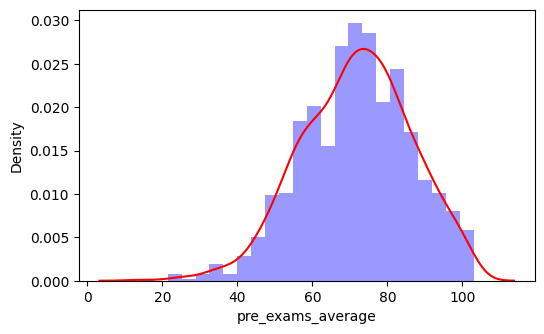

In [152]:
# univariate distribution of numerical features

plt.figure(figsize=(20,50))
plotnumber =1
for num_feature in numeric_features:
    skewness = df_final[num_feature].skew()
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_final[num_feature],hist_kws={"color": "blue"}, kde_kws={"color": "red"})
    plt.xlabel(num_feature)
    print(f"Skewness of column '{num_feature}': {skewness:.2f}")
    plotnumber+=1
    
plt.show()

The data distribution is left-skewed, and it may be influenced by outliers or values on the lower end of the scale

#### <font color=blue>ii. Categorical Features</font>

In [153]:
# count of each value in each cat column
cat_counts=[]
for cat_col in categorical_features:
    cat_counts = df_final[cat_col].value_counts()
    print(cat_counts)
    print('__________________________')
    cat_counts += 1

gender
female    582
male      520
other      15
Name: count, dtype: int64
__________________________
race_ethnicity
group C    354
group D    293
group B    211
group E    160
group A     99
Name: count, dtype: int64
__________________________
level_of_education
high school           388
some college          237
associate's degree    231
some high school      182
bachelor's degree      49
master's degree        20
Name: count, dtype: int64
__________________________
language_proficiency
fluent          724
intermediate    373
limitted         20
Name: count, dtype: int64
__________________________
training_manuals
none        705
provided    400
Name: count, dtype: int64
__________________________


In [154]:
# Define Function to create lable percentages on top of count plot of each categorical feature
def percent_label(ax, spacing=0.5):
    p = 0
    for rect in ax.patches:
        p += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}".format( y_value/p*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va) 

Gender


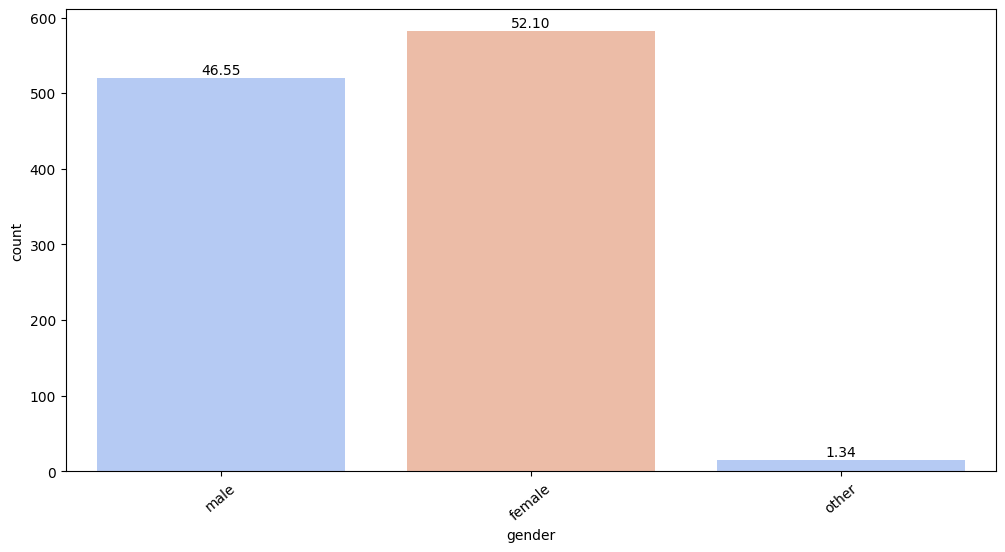

Race_Ethnicity


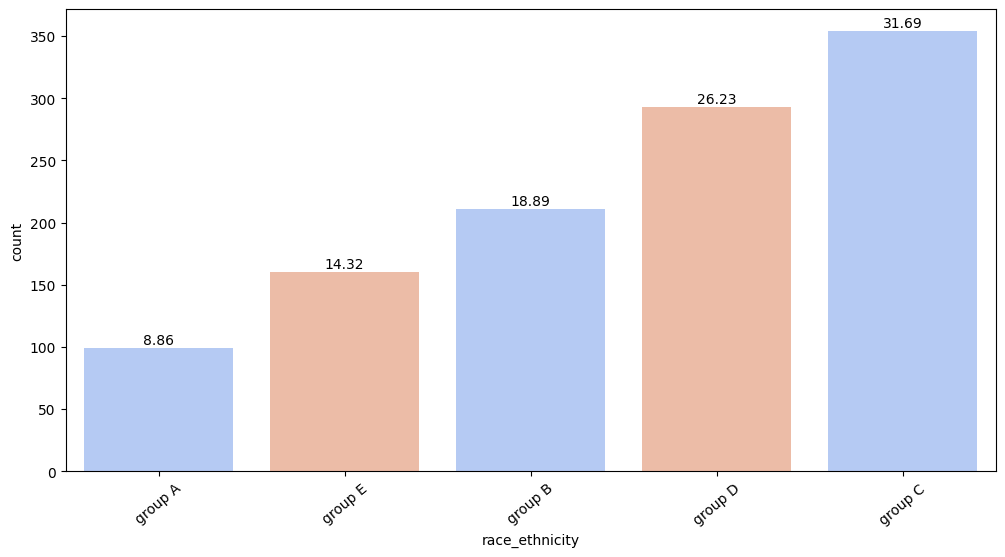

Level_Of_Education


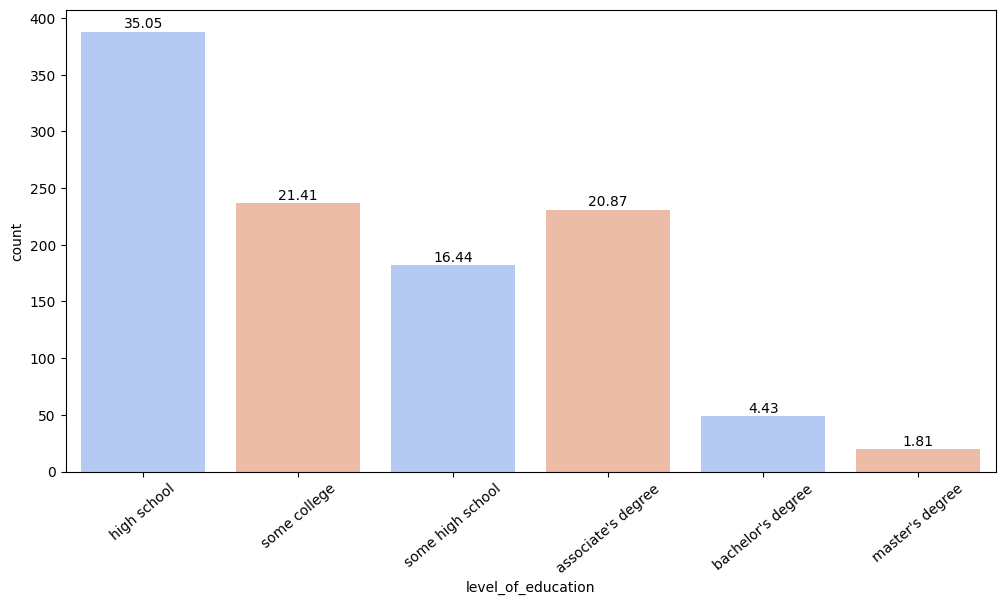

Language_Proficiency


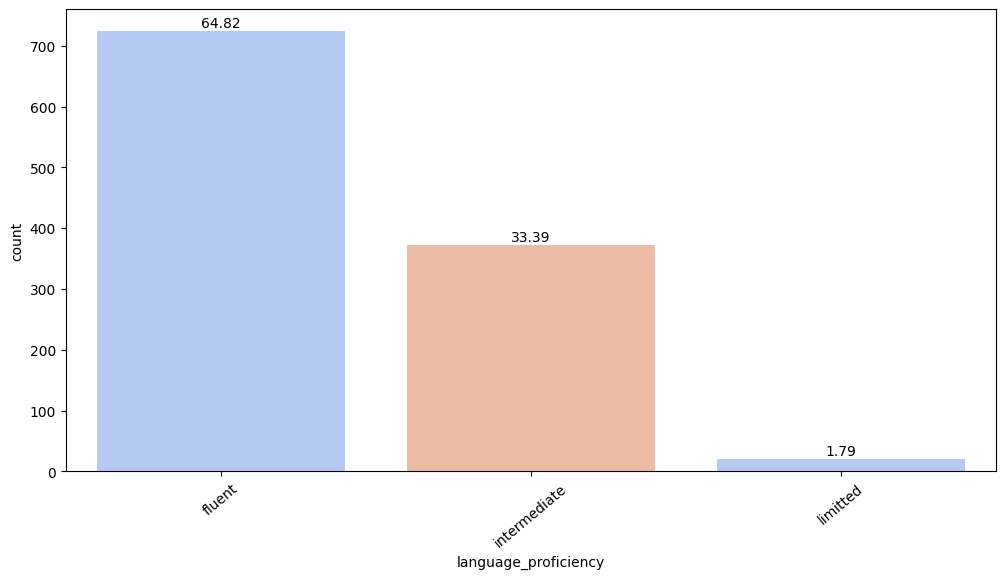

Training_Manuals


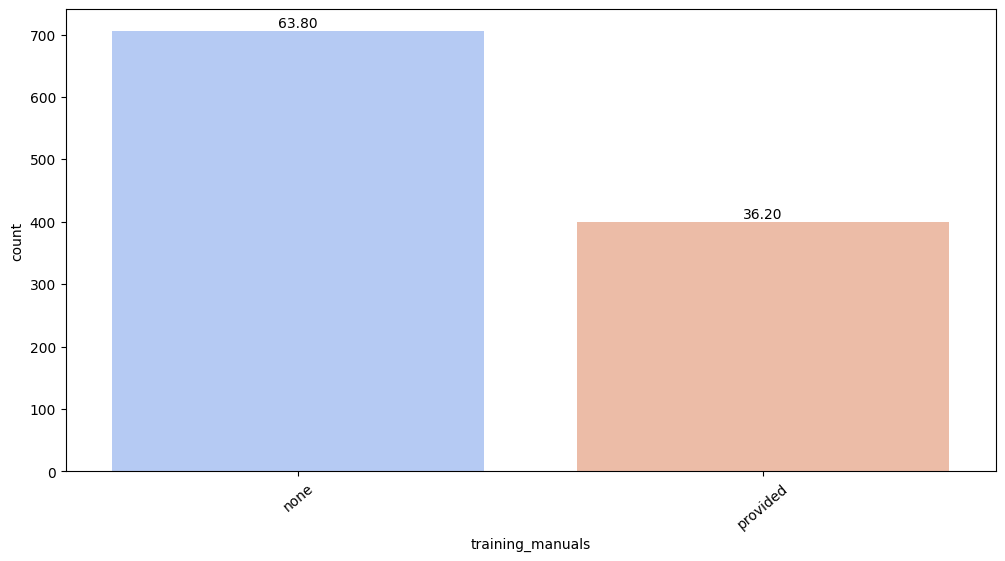

In [155]:
# create the plot for the cat vars
for column in categorical_features:
    plt.figure(figsize=(12, 6))
    plt.xticks(rotation=40)
    print(column.title())
    ax = sns.countplot(x = df_final[column], palette=sns.color_palette('coolwarm', n_colors=2))
    percent_label(ax)
    plt.show()

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
    <ul>
     <li> Gender: Highest Number (around 52%) of examinees are females and very few are Other </li>
     <li> Race_Ethnicity: Around 32% of examinees are from Group C and on 9% from Group A. </li>  
     <li> Level_Of_Education: More number of examinees are Highschool grads and only few hold Bachelors or Masters degrees. </li>
     <li> Language_Proficiency: Majority of the eaminees are fluent in Language </li>
     <li> training_ manual:training manuals are not properly distributed to trainees </li>
     
</ul>
</div>

#### <font color=blue>iii. Target variable Analysis </font>

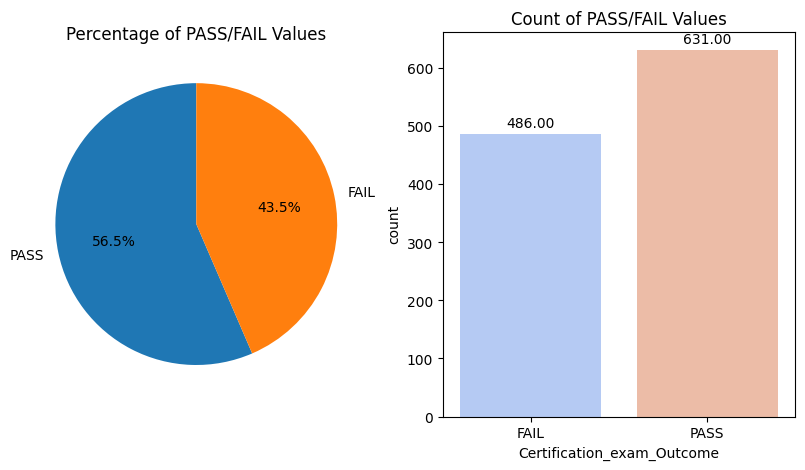

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Create a pie chart in the first column to show the percentage of target values
axs[0].pie(df_final['Certification_exam_Outcome'].value_counts(), labels=df_final['Certification_exam_Outcome'].value_counts().index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Percentage of PASS/FAIL Values')

# Create a count plot in the second column to show the count of each target value
plots=sns.countplot(data=df_final, x=df_final["Certification_exam_Outcome"], palette=sns.color_palette('coolwarm', n_colors=2))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
axs[1].set_title('Count of PASS/FAIL Values')

# Display the plot
plt.show()

<div class="alert alert-block alert-info">
    <b>INSIGHTS </b>&#9658
   
     Target variable Data is not balanced, but it is nice to have 50:50. 
     

</div>

#### <font color=blue>iv. Target variable vs num features Analysis </font>

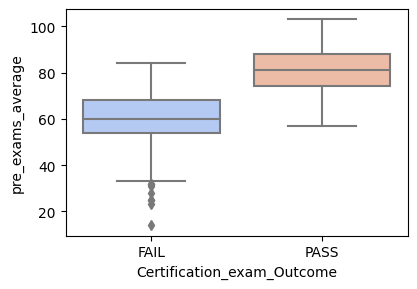

In [157]:
# boxplots to show values of num features across Target var
fig=plt.figure(figsize=(15,10))
palette=sns.color_palette('coolwarm', n_colors=2)
for i in range(len(numeric_features)):
    column= numeric_features[i]
    sub=fig.add_subplot(3,3,i+1)
    sns.boxplot(x='Certification_exam_Outcome', y=column, data=df_final, palette=palette)

There are some outliers near the min value of thi column

### Summary Statistics

In [158]:
summary_stats = df_final[['pre_exams_average']].describe()
print(summary_stats)

       pre_exams_average
count        1115.000000
mean           71.797309
std            14.616037
min            14.000000
25%            62.000000
50%            72.000000
75%            82.000000
max           103.000000


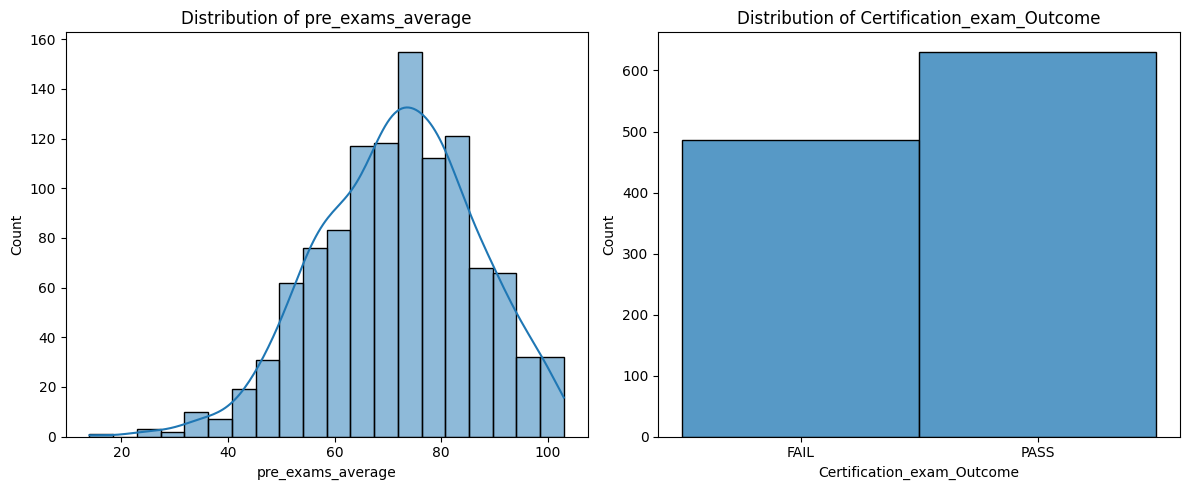

In [159]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_final['pre_exams_average'], bins=20, kde=True)
plt.title('Distribution of pre_exams_average')


plt.subplot(1, 2, 2)
sns.histplot(df_final['Certification_exam_Outcome'], bins=20, kde=False)
plt.title('Distribution of Certification_exam_Outcome')

plt.tight_layout()
plt.show()

### Relationships and Correlations:

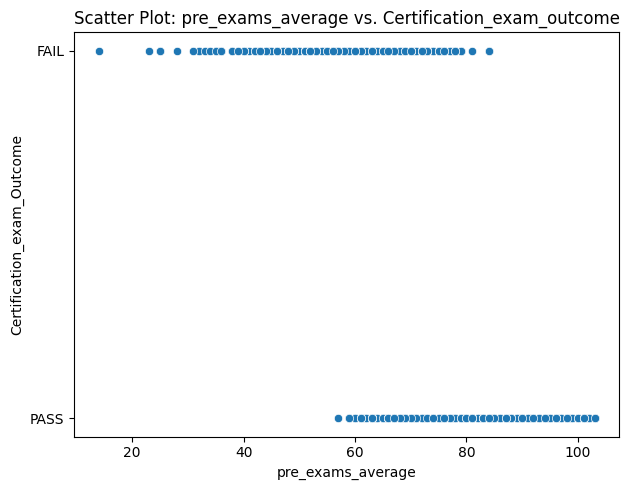

In [160]:
# relationships between numerical variables and the target variable
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_final, x='pre_exams_average', y='Certification_exam_Outcome')
plt.title('Scatter Plot: pre_exams_average vs. Certification_exam_outcome')


plt.tight_layout()
plt.show()

#### <font color=blue>vi. Target variable vs cat features Analysis </font>

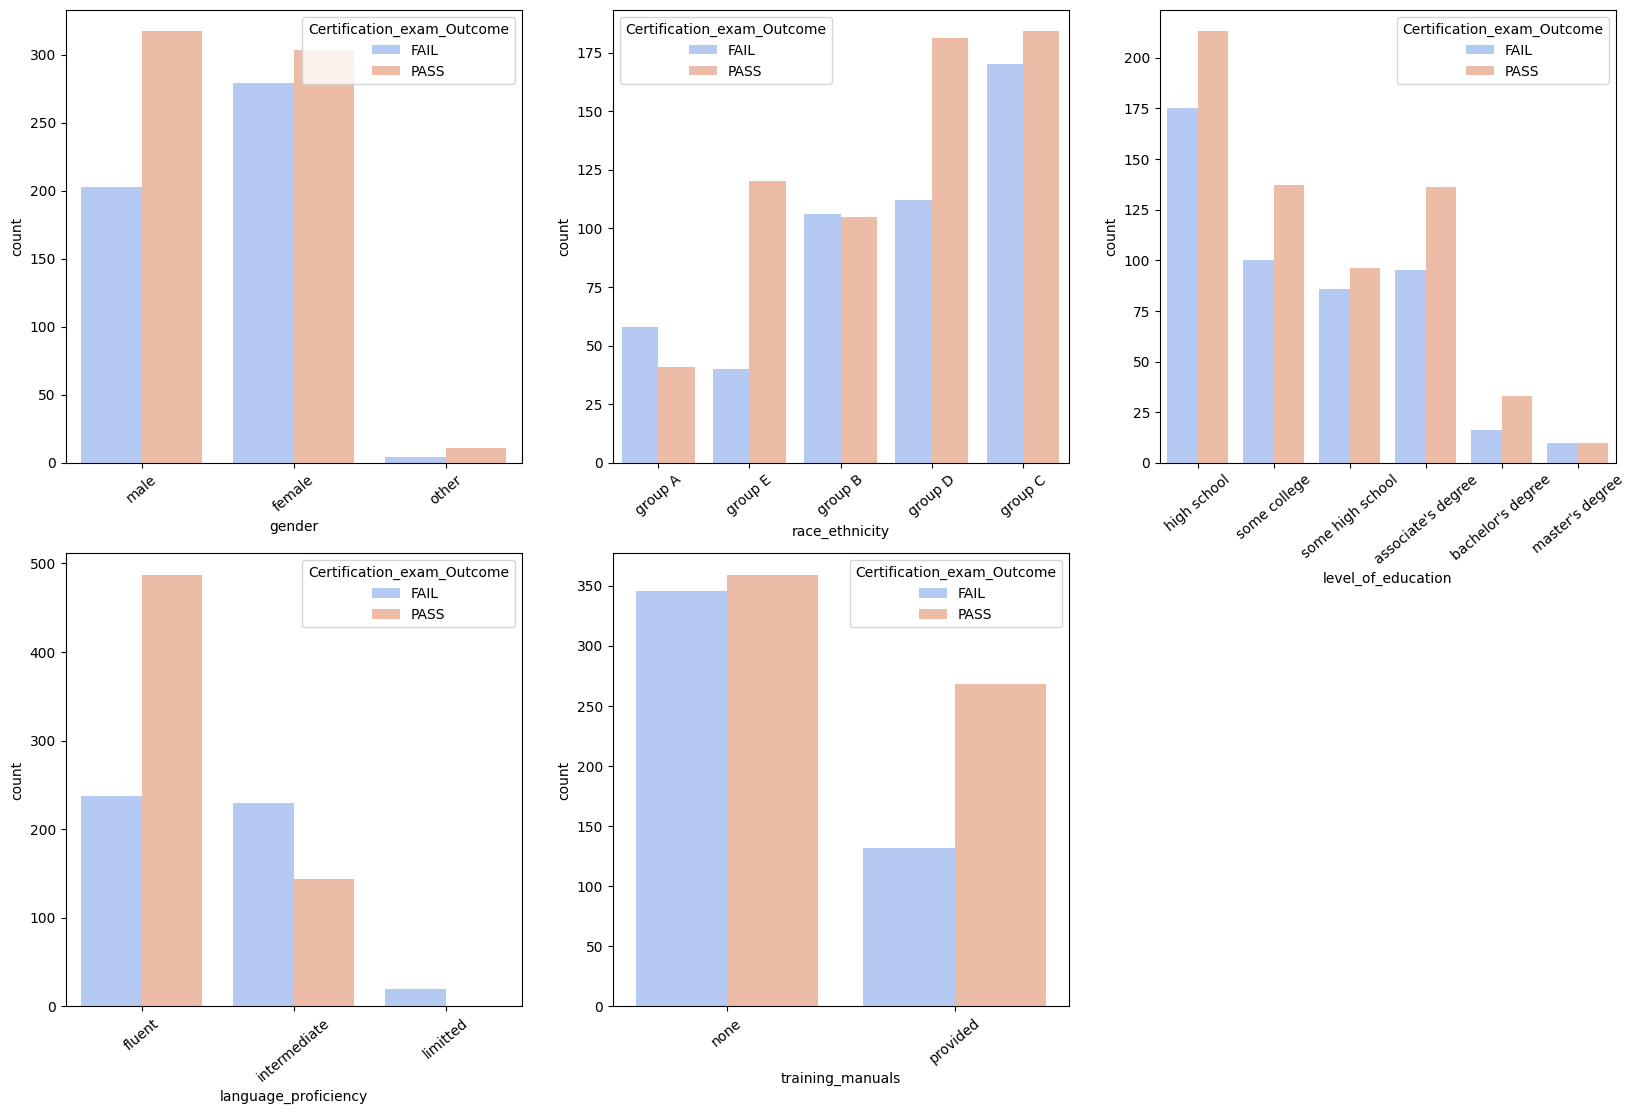

In [161]:
# Create countplot showing count of each category by target value
i = 0
plt.figure(figsize=(20,20))
for cat_feature in categorical_features:
    i += 1
    plt.subplot(3, 3, i)
    plt.xticks(rotation=40)
    sns.countplot(x = df_final[cat_feature], data = df_final, hue = "Certification_exam_Outcome", palette=sns.color_palette('coolwarm', n_colors=2))
plt.show()

- Gender, training_manual--> no effect on final routcome
- other variables are significant

### Handling outliers

In [162]:
# cols = ['Certification_exam_score']

# for column in cols:

#     Q1 = df_final[column].quantile(0.25)
#     Q3 = df_final[column].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_final[column] = np.where(df_final[column] < lower_bound, lower_bound, df_final[column])
#     df_final[column] = np.where(df_final[column] > upper_bound, upper_bound, df_final[column])

## Last cleaned data

In [167]:
df_final['Certification_exam_Outcome'] = df_final['Certification_exam_Outcome'].replace({'PASS': 1, 'FAIL': 0})

In [168]:
df_final.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average,Certification_exam_Outcome
0,male,group A,high school,fluent,none,66.0,0
1,female,group E,some college,intermediate,provided,87.0,1
2,male,group A,some college,fluent,none,48.0,0
3,female,group E,some college,fluent,provided,75.0,1
4,male,group E,some college,fluent,none,71.0,1


In [169]:
selected_columns = ['gender','race_ethnicity','level_of_education',	'language_proficiency',	'training_manuals','pre_exams_average',  'Certification_exam_Outcome']

df_cleaned=df_final[selected_columns]

df_cleaned.head()

,gender,race_ethnicity,level_of_education,language_proficiency,training_manuals,pre_exams_average,Certification_exam_Outcome
0,male,group A,high school,fluent,none,66.0,0
1,female,group E,some college,intermediate,provided,87.0,1
2,male,group A,some college,fluent,none,48.0,0
3,female,group E,some college,fluent,provided,75.0,1
4,male,group E,some college,fluent,none,71.0,1


## Save Cleaned Data for Modeling

In [170]:
df_cleaned.to_csv('data/cleaned_data.csv', index=False)